The goal of any regression analysis is to predict data points by making a mathematical function that approximates it.      
The equation of a linear regression is $$Y=a+bX$$
This is exactly the same as the equation of a line, or a linear equation, the only difference is the naming convention.

Before getting into using the equation on this data set, first, take in the data. In this case it's in `co2emissions.csv`. This has several locations yearly carbon emissions from 2015-2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./data/co2emissions.csv")
df.head()

,OrganisationLabel,OrganisationURI,PublishedDate,DurationFrom,DurationTo,LatestData,ReportingPeriodType,GeoEntityName,GeoCode,GeoName,GeoURI,Year,CO2EmissionsTonnesPerPerson
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2022-07-01T00:00:00,2020-01-01T00:00:00,2020-12-31T23:59:59,True,Calendar Year,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,2020,4.1
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2022-07-01T00:00:00,2020-01-01T00:00:00,2020-12-31T23:59:59,True,Calendar Year,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,2020,3.7
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2022-07-01T00:00:00,2020-01-01T00:00:00,2020-12-31T23:59:59,True,Calendar Year,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,2020,4.3
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2022-07-01T00:00:00,2020-01-01T00:00:00,2020-12-31T23:59:59,True,Calendar Year,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,2020,2.8
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2022-07-01T00:00:00,2020-01-01T00:00:00,2020-12-31T23:59:59,True,Calendar Year,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,2020,4.2


Then display the data using a dot plot. Also get a general idea of the mode of the data with a histogram.

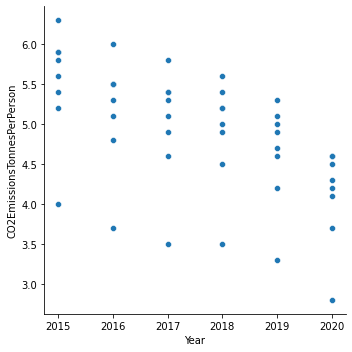

<AxesSubplot:xlabel='CO2EmissionsTonnesPerPerson', ylabel='Count'>

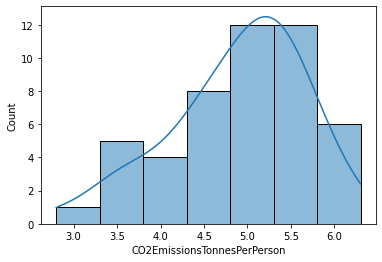

In [3]:
sns.relplot(data=df, x="Year", y="CO2EmissionsTonnesPerPerson")
plt.show()
sns.histplot(data=df["CO2EmissionsTonnesPerPerson"], binwidth=0.5, kde=True)

Given the equation of a linear regression is
$$Y=a+bX$$
If the given data points satisfy the definition of a one-to-one function, then the **least squares** method can be used. If it doesn't then some other technique must be used, like gradient descent or ordinary least squares.
$$
a=\frac
{\sum{}y-b(\sum{}x)}
{n}
$$
$$ 
b=\frac 
{n\sum_{}^{}xy-(\sum_{}^{}x)(\sum_{}^{}y)} 
{ n\sum_{}^{}x^2-(\sum_{}^{}x)^2}
$$
$R$, also known as the correlation coefficient, measures the strength and direction of the linear relationship between the dependent variable and the independent variable(s). It ranges from -1 to +1, where -1 represents a perfect negative linear relationship, +1 represents a perfect positive linear relationship, and 0 represents no linear relationship. 

$R^2$ is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variable(s) in the linear regression model. It is calculated as the square of the correlation coefficient ($R$). $R^2$ ranges from 0 to 1, with 0 indicating that none of the variance in the dependent variable is explained by the independent variable(s), and 1 indicating that all of the variance in the dependent variable is explained.
$$
R=\frac
{n\sum_{}^{}xy-\sum_{}^{}x\sum_{}^{}y}
{\sqrt{[n\sum_{}^{}x^2-(\sum_{}^{}x)^2][n\sum_{}^{}y^2-(\sum_{}^{}y)^2]}}
$$   



To use the least squares formulas in this case, only choose one location from the data.

In [4]:
# only use data from boston
df = df[df.GeoName == "Boston"]
df = df[['Year','CO2EmissionsTonnesPerPerson']]
df.head()


,Year,CO2EmissionsTonnesPerPerson
1,2020,3.7
9,2019,4.2
17,2018,4.5
25,2017,4.6
33,2016,4.8


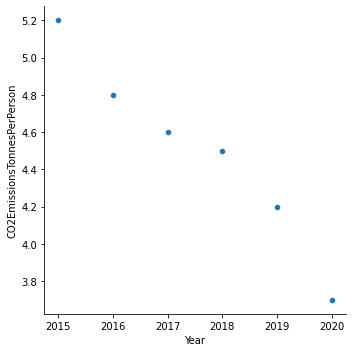

In [5]:
sns.relplot(data=df, x="Year", y="CO2EmissionsTonnesPerPerson")

In [6]:
n, sumx, sumx_squared, sumy, sumy_squared, sumxy = 0, 0, 0, 0, 0, 0

# iterate through each row
for i in df.index:
	x = df["Year"][i]
	sumx += x
	sumx_squared += x**2
	y = df["CO2EmissionsTonnesPerPerson"][i]
	n += 1
	sumy += y
	sumy_squared += y**2
	sumxy += x * y

# calculate the coefficients
b = (n * sumxy - sumx * sumy) \
/ (n * sumx_squared - (sumx)**2)

a = (sumy - b * sumx) / n

R = (n * sumxy - sumx * sumy) \
/ ( (n*sumx_squared-sumx**2) * (n * sumy_squared - sumy**2) )**(1/2)

R_squared = R**2
print(f"Y = {round(a, 2)} + {round(b, 2)}X")
print(f"R squared: {round(R_squared, 2)}")
print(f"R: {round(R, 2)}")
		

Y = 546.34 + -0.27X
R squared: 0.96
R: -0.98


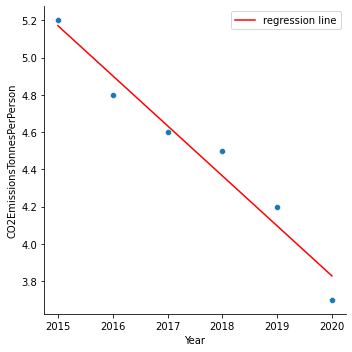

96.0% of the variation can be explained by the regression line.
4.0% of the variation is unexplained and is due to other factors or to sampling error.


In [7]:
# plot the regression line
reg_years=list(range(min(df["Year"]), max(df["Year"])+1))
reg_emissions=[a + b*x for x in reg_years]


sns.relplot(data=df, x="Year", y="CO2EmissionsTonnesPerPerson")

plt.plot(reg_years, reg_emissions, "red", label="regression line")
plt.legend()
plt.show()
print(f"{round(R_squared, 2)*100}% of the variation can be explained by the regression line.")
print(f"{round(1-R_squared, 2)*100}% of the variation is unexplained and is due to other factors or to sampling error.")

The $R^2$ value is high enough to tell that the linear regression method used was effective. If it was noticabley low, like 0.10, for example, another regression technique may have to be used on the data.